In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# we will limit the number of decimal places we display
pd.options.display.float_format = '{:,.2f}'.format 

In [3]:
datafile_name= "../Data/Data/cleaned_data_csv.csv"
abt = pd.read_csv(datafile_name, index_col=0)

In [5]:
abt_discount_zero = abt[abt['Discount'] == 0]

# DataFrame where Discount is not equal to 0
abt_discount_non_zero = abt[abt['Discount'] != 0]

# Print the resulting DataFrames
print("DataFrame with Discount == 0:")
print(abt_discount_zero)

print("\nDataFrame with Discount != 0:")
print(abt_discount_non_zero)

DataFrame with Discount == 0:
            Country         City    Customer Name        Order ID  \
0     United States    Henderson      Claire Gute  CA-2013-152156   
1     United States    Henderson      Claire Gute  CA-2013-152156   
2     United States  Los Angeles  Darrin Van Huff  CA-2013-138688   
5     United States  Los Angeles  Brosina Hoffman  CA-2011-115812   
6     United States  Los Angeles  Brosina Hoffman  CA-2011-115812   
...             ...          ...              ...             ...   
9987  United States       Athens     Ruben Ausman  CA-2014-163629   
9988  United States       Athens     Ruben Ausman  CA-2014-163629   
9990  United States   Costa Mesa      Dave Brooks  CA-2014-121258   
9992  United States   Costa Mesa      Dave Brooks  CA-2014-121258   
9993  United States  Westminster     Chris Cortes  CA-2014-119914   

      Postal Code Region  Row ID       State Top N Customer Label  Order Date  \
0       42,420.00  South       1    Kentucky                

In [9]:
outfile_name1 = "../Data/Data/cleaned_data_discount_csv.csv"
abt_discount_zero.to_csv(outfile_name1)

In [11]:
outfile_name2 = "../Data/Data/cleaned_data1_non_csv.csv"
abt_discount_non_zero.to_csv(outfile_name2)

In [13]:
abt_discount_zero['Profit'].mean()

66.86905744680851

In [15]:
abt_discount_non_zero['Profit'].mean()

23.453470384615386

In [17]:
mean_profit_discount_zero = abt_discount_zero['Profit'].mean()
mean_profit_discount_non_zero = abt_discount_non_zero['Profit'].mean()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Segment': ['Non-Discount Product', 'Discount Product'],
    'Mean Profit': [mean_profit_discount_zero, mean_profit_discount_non_zero]
})

# Create pivot table
pivot_table = pd.pivot_table(summary_df, values='Mean Profit', index='Segment', aggfunc='mean').reset_index()

print("\nPivot Table:")
print(pivot_table)


Pivot Table:
                Segment  Mean Profit
0      Discount Product        23.45
1  Non-Discount Product        66.87


/var/folders/cl/m7kxvkhn1x3drmm_nb6j89280000gn/T/ipykernel_58744/331450413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Mean Profit', data=summary_df, palette='viridis')


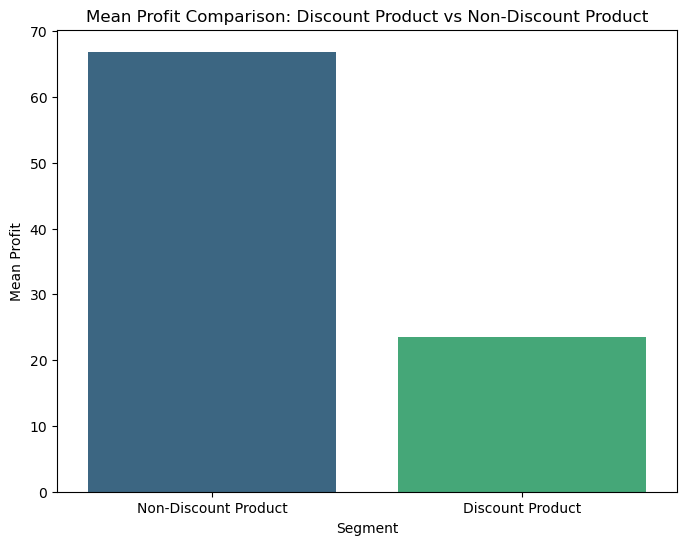

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Mean Profit', data=summary_df, palette='viridis')
plt.title('Mean Profit Comparison: Discount Product vs Non-Discount Product')
plt.xlabel('Segment')
plt.ylabel('Mean Profit')
plt.show()

In [25]:
abt1 = pd.concat([abt_discount_zero, abt_discount_non_zero], ignore_index=True)

# Output
print("Combined DataFrame:")
print(abt1)

Combined DataFrame:
            Country         City     Customer Name        Order ID  \
0     United States    Henderson       Claire Gute  CA-2013-152156   
1     United States    Henderson       Claire Gute  CA-2013-152156   
2     United States  Los Angeles   Darrin Van Huff  CA-2013-138688   
3     United States  Los Angeles   Brosina Hoffman  CA-2011-115812   
4     United States  Los Angeles   Brosina Hoffman  CA-2011-115812   
...             ...          ...               ...             ...   
9989  United States  Los Angeles        Anne Pryor  US-2013-103674   
9990  United States  Los Angeles        Anne Pryor  US-2013-103674   
9991  United States    Fairfield   Ted Butterfield  CA-2014-163566   
9992  United States        Miami  Tom Boeckenhauer  CA-2011-110422   
9993  United States   Costa Mesa       Dave Brooks  CA-2014-121258   

      Postal Code Region  Row ID       State Top N Customer Label  Order Date  \
0       42,420.00  South       1    Kentucky              

In [27]:
outfile_name3 = "../Data/Data/cleaned_data2_csv.csv"
abt1.to_csv(outfile_name3)